In [1]:
"""
This script takes a data grid with lat/lon 1D arrays and writes a geotif using the standard WGS84 projection
used: https://rasterio.readthedocs.io/en/latest/quickstart.html
"""

'\nThis script takes a data grid with lat/lon 1D arrays and writes a geotif using the standard WGS84 projection\nused: https://rasterio.readthedocs.io/en/latest/quickstart.html\n'

In [1]:
import rasterio
from rasterio.transform import Affine

from netCDF4 import Dataset
from matplotlib import pyplot

In [10]:
source_nc = "Retrieval_Domain_Davis_Option1.nc"
dest_geotif = 'option1_dd_angle.tif'

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Single-Doppler and Dual-Doppler Coverage of Davis Aerodrome location
    contact: Alain Protat (alain.protat@bom.gov.au)
    idl_code: sdc-dualpoldev directory 3DWIND_5RADARS_CLEAN-TORNADO code dual_doppler.pro
    dimensions(sizes): nlon(240), nlat(240)
    variables(dimensions): float32 longitude(nlon), float32 latitude(nlat), float32 xmin(), float32 ymin(), float32 x(nlon), float32 y(nlat), float32 single_doppler_coverage(nlat,nlon), float32 dual_doppler_angle(nlat,nlon)
    groups: 
0.0009958267211914063 0.0009958267211914063


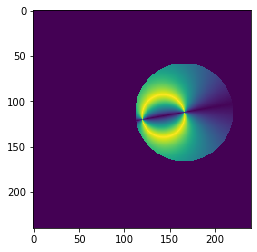

In [11]:
with Dataset(source_nc, "r", format="NETCDF4") as ds:
    print(ds)
    ds_lat = ds['latitude'][:]
    ds_lon = ds['longitude'][:]
    data = ds['dual_doppler_angle'][:]
    pyplot.imshow(data)
    
    #extract resolution
    lon_res = (ds_lon[-1] - ds_lon[0]) / len(ds_lon)
    lat_res = (ds_lat[-1] - ds_lat[0]) / len(ds_lat)
    print(lon_res, lat_res)
    #create transform
    transform = Affine.translation(ds_lon[0] - lon_res / 2, ds_lat[0] - lat_res / 2) * Affine.scale(lon_res, lat_res)
    
    #create new dataset in memort
    new_dataset = rasterio.open(dest_geotif, 'w',driver='GTiff', height=data.shape[0], width=data.shape[1],
                                count=1, dtype=data.dtype, crs='+proj=latlong', transform=transform)
    
    #write
    new_dataset.write(data, 1)
    new_dataset.close()